In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_row',1000)

### 2.4.1缺失值处理

In [197]:
# 导入美国年度失业率数据
unemploy = pd.read_csv('data\\unemployment.csv')

In [198]:
unemploy.head()

,year,rate
0,1955,4.383333
1,1956,4.141667
2,1957,4.258333
3,1958,6.800000
4,1959,5.475000


In [199]:
# 构建一列随机缺失值列
unemploy['missing'] = unemploy['rate']
# 随机选择10%行手动填充缺失值
mis_index = unemploy.sample(frac=0.1,random_state=999).index
unemploy.loc[mis_index,'missing']=None

**1.使用 forward fill填补缺失值**

In [200]:
unemploy['f_fill'] = unemploy['missing']
unemploy['f_fill'].ffill(inplace=True)

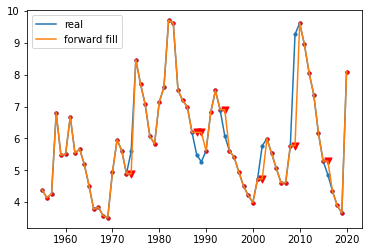

In [201]:
# 观察填充效果
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,label='forward fill')
plt.legend()

**2.使用moving average填补缺失值**

In [202]:
unemploy['moveavg']=np.where(unemploy['missing'].isnull(),
                             unemploy['missing'].shift(1).rolling(3,min_periods=1).mean(),
                             unemploy['missing'])

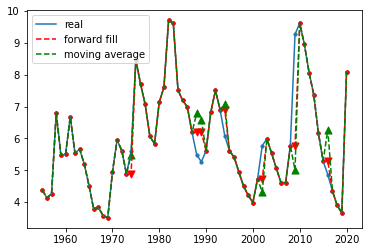

In [203]:
# 观察填充效果
plt.scatter(unemploy.year,unemploy.rate,s=10)
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].f_fill,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].f_fill,s=50,c='r',marker='v')
plt.plot(unemploy.year,unemploy.f_fill,label='forward fill',c='r',linestyle = '--')
plt.scatter(unemploy[~unemploy.index.isin(mis_index)].year,unemploy[~unemploy.index.isin(mis_index)].moveavg,s=10,c='r')
plt.scatter(unemploy.loc[mis_index].year,unemploy.loc[mis_index].moveavg,s=50,c='g',marker='^')
plt.plot(unemploy.year,unemploy.moveavg,label='moving average',c='g',linestyle = '--')
plt.legend()

**3.使用interpolation填补缺失值**

In [204]:
# 尝试线性插值和多项式插值
unemploy['inter_lin']=unemploy['missing'].interpolate(method='linear')
unemploy['inter_poly']=unemploy['missing'].interpolate(method='polynomial', order=3)

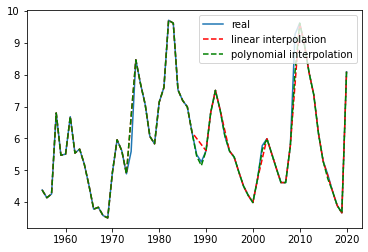

In [205]:
# 观察填充效果
plt.plot(unemploy.year,unemploy.rate,label='real')
plt.plot(unemploy.year,unemploy.inter_lin,label='linear interpolation',c='r',linestyle = '--')
plt.plot(unemploy.year,unemploy.inter_poly,label='polynomial interpolation',c='g',linestyle = '--')
plt.legend()

### 2.4.2 数据平滑

In [3]:
# 导入航空乘客数据
air = pd.read_csv('data\\air.csv')

In [4]:
air.head()

,Date,Passengers
0,1949/1,112
1,1949/2,118
2,1949/3,132
3,1949/4,129
4,1949/5,121


In [13]:
# 设置两种平滑系数
air['smooth_0.5']= air.Passengers.ewm(alpha =0.5).mean()
air['smooth_0.9']= air.Passengers.ewm(alpha =0.9).mean()

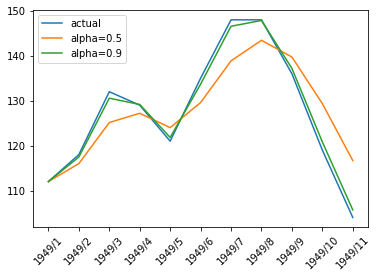

In [25]:
plt.plot(air.Date,air.Passengers,label='actual')
plt.plot(air.Date,air['smooth_0.5'],label='alpha=0.5')
plt.plot(air.Date,air['smooth_0.9'],label='alpha=0.9')
plt.xticks(rotation=45)
plt.legend()